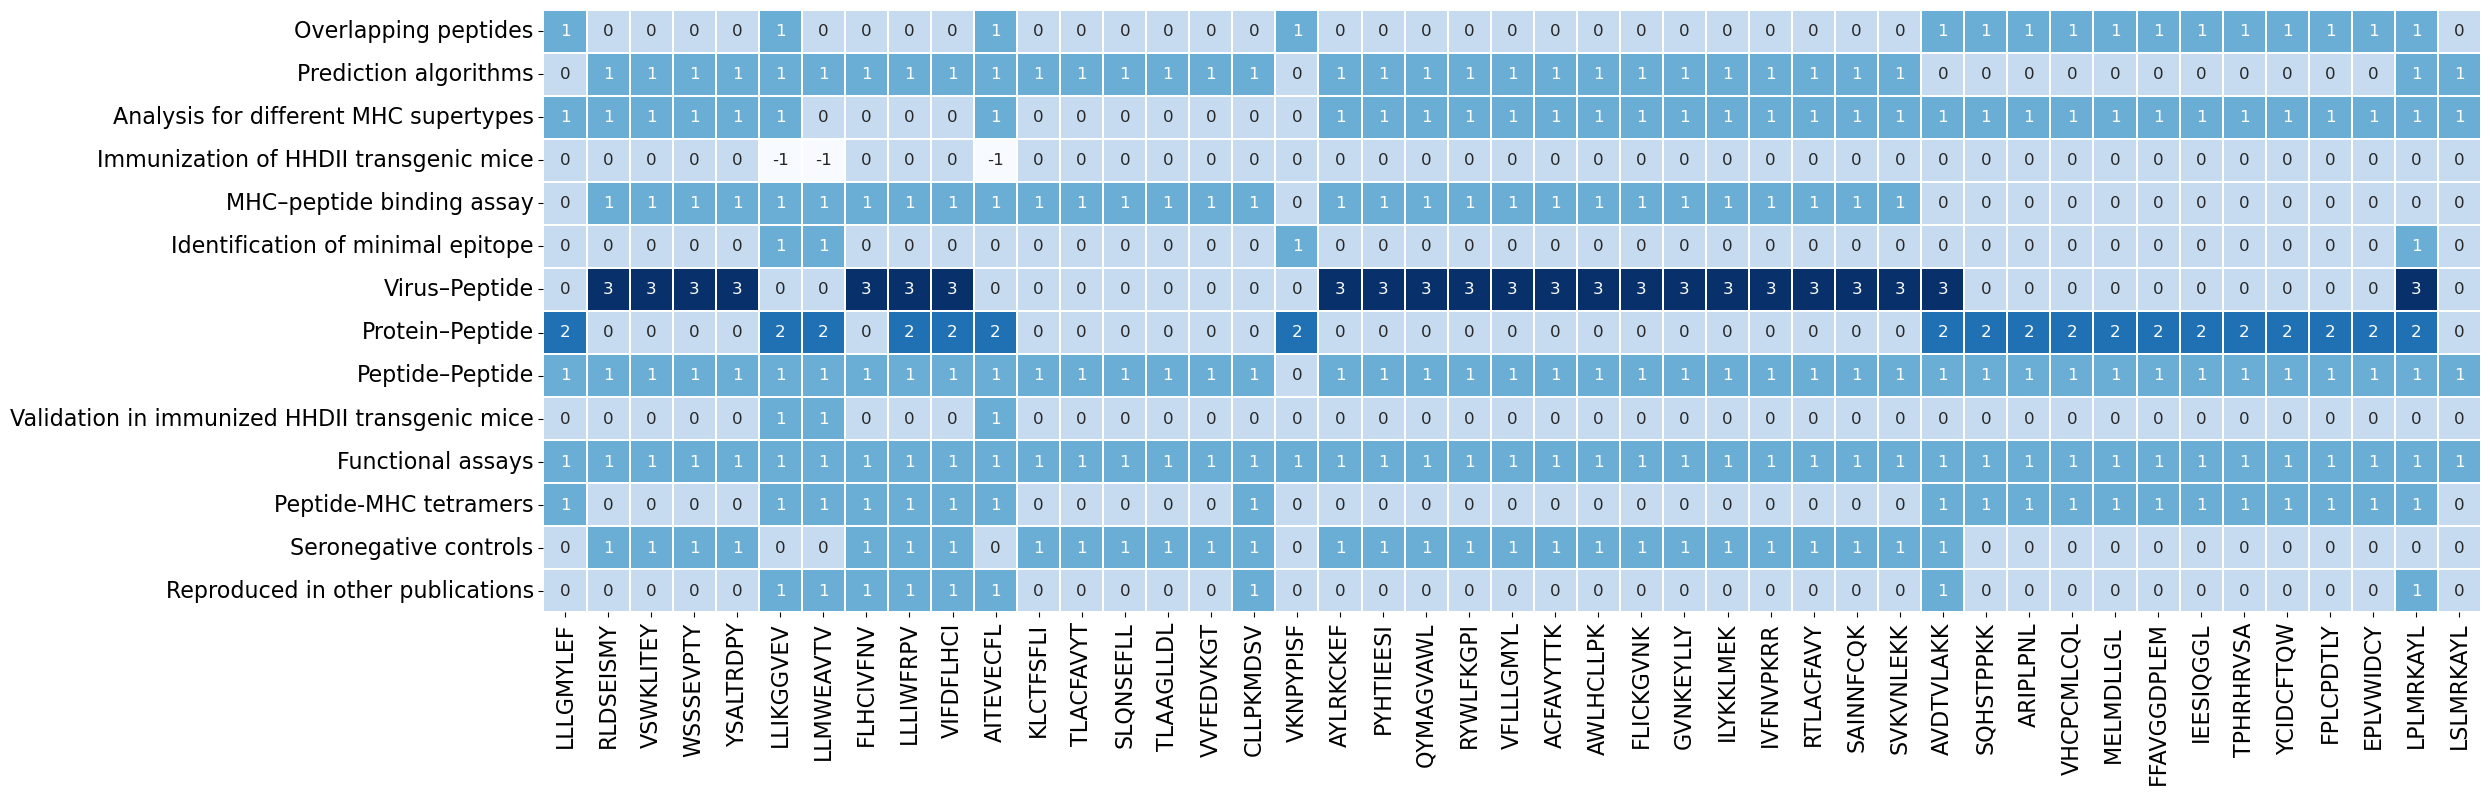

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# read in data from excel 
df = pd.read_excel("Dataframe for decision matrix_BKV peptides.xlsx")

# drop any rows with empty values
df.dropna(inplace=True)

# create a decision matrix
data = df.iloc[:,1: -1].join(df['Reproduced in other publications'])
data_transposed = data.T

# adjust figure size and x-tick label font size
fig, ax = plt.subplots(figsize=(25, 15))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# create heatmap
heatmap = sns.heatmap(data_transposed, linewidths = 0.25, cmap="Blues", annot=True, fmt="d", annot_kws={"size": 12}, cbar=False, square = True, ax=ax)

# set x and y tick labels
heatmap.set_xticklabels(df["Epitope"], rotation=90)
heatmap.set_yticklabels(data_transposed.index, rotation=0)

# adjust x and y axis tick locators
heatmap.xaxis.set_major_locator(ticker.FixedLocator(np.arange(0.5, len(df)+0.5)))
heatmap.yaxis.set_major_locator(ticker.FixedLocator(np.arange(0.5, len(data_transposed)+0.5)))

# display the plot
plt.show()

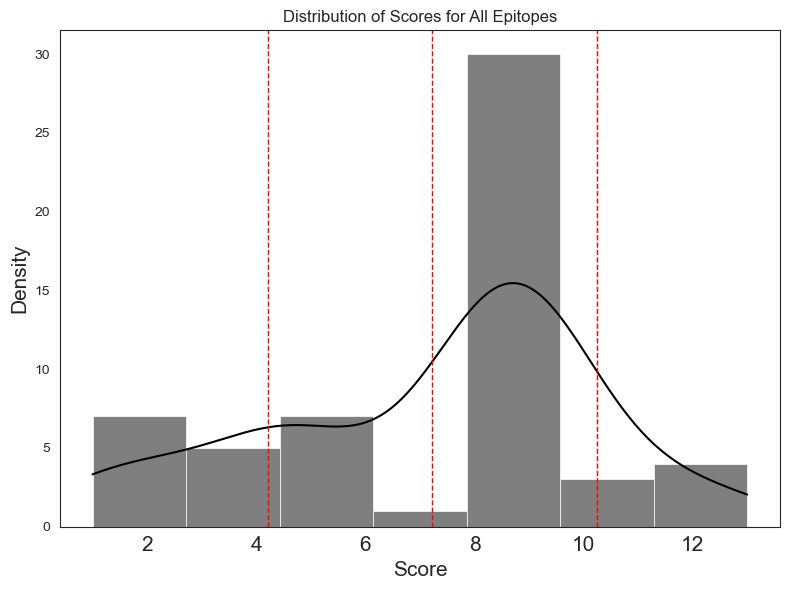

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in data from excel
df = pd.read_excel("Dataframe for decision matrix_BKV peptides.xlsx")

# Drop any rows with empty values
df.dropna(inplace=True)

# Set the figure size and style
plt.figure(figsize=(8, 6))
sns.set_style("white")

# Calculate mean and standard deviation for all scores
mean = df["Score"].mean()
std = df["Score"].std()

# Define cutoffs at 1 standard deviation above and below the mean
cutoffs = [mean - std, mean, mean + std]

# Plot the distribution of scores
sns.histplot(data=df, x="Score", kde=True, color="black", edgecolor="white", linewidth=0.5)

# Plot vertical lines at the cutoffs
for cutoff in cutoffs:
    plt.axvline(x=cutoff, color='red', linestyle='--', linewidth=1)

# Set the title and labels
plt.title("Distribution of Scores for All Epitopes", fontsize=12)
plt.xlabel("Score", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.xticks(fontsize=15)

# Adjust the plot layout
plt.tight_layout()

# Show the plot
plt.show()


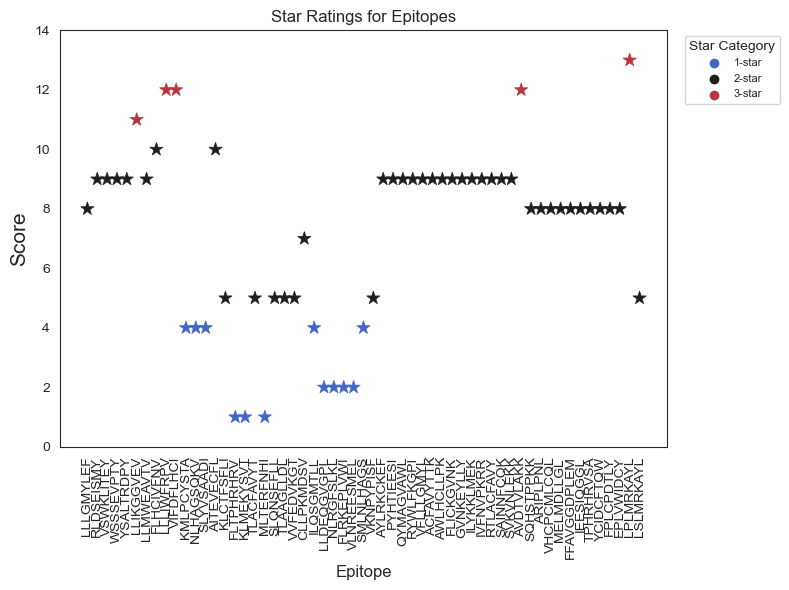

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in data from excel
df = pd.read_excel("Dataframe for decision matrix_BKV peptides.xlsx")

# Drop any rows with empty values
df.dropna(inplace=True)

# Define the cutoff scores for each star category
cutoffs = [0, 4, 10, 13]

# Define the labels for each star category
labels = ['1-star', '2-star', '3-star']

# Create a new column for the star category labels
df['Star Category'] = pd.cut(df['Score'], bins=cutoffs, labels=labels, include_lowest=True)

# Set the figure size and style
plt.figure(figsize=(8, 6))
sns.set_style("white")

# Plot a scatterplot with different colors for each star category
sns.scatterplot(data=df, x='Epitope', y='Score', hue='Star Category', palette='icefire', s=100, linewidth=0.5, edgecolor=None, marker='*')

# Set the title, labels, and legend
plt.title('Star Ratings for Epitopes', fontsize=12)
plt.xlabel('Epitope', fontsize=12)
plt.ylabel('Score', fontsize=15)
plt.xticks(rotation=90, fontsize=10)
plt.legend(title='Star Category', loc='upper left', fontsize=8, bbox_to_anchor=(1.02, 1))

# Set the y-axis limits
plt.ylim([0, 14])

# Adjust the plot layout
plt.tight_layout()

# Show the plot
plt.show()
